In [80]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen 
import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import time
import requests
import scrapy
from scrapy.crawler import CrawlerProcess
import json
import numpy as np 
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score,cross_val_predict


# Inputting the URL

In [21]:
#url = 'https://www.udemy.com/robots.txt'
#response  = requests.get(url)
#print(response.text)

In [43]:
ch='/Users/elyasm/Downloads/chromedriver'
de=15

In [44]:
driver=webdriver.Chrome(executable_path=ch)
driver.get('https://www.udemy.com/courses/it-and-software/?p=1')

In [45]:
def extract_text(soup_obj, tag, attribute_name, attribute_value):
    txt = soup_obj.find(tag, {attribute_name: attribute_value}).text.strip() if soup_obj.find(tag, {attribute_name: attribute_value}) else ''
    return txt

rows = []

for page_number in range(151, 625):
   #f'https://www.udemy.com/courses/it-and-software/?p={page_number}'
    page_url =f'https://www.udemy.com/courses/it-and-software/?has_closed_caption=true&p={page_number}&sort=popularity'
    driver.get(page_url)
    time.sleep(7)

    try:
        WebDriverWait(driver, de).until(EC.presence_of_element_located((By.CLASS_NAME, 'course-list--container--3zXPS')))
    except TimeoutException:
        print('Loading exceeds delay time')
        break
    else:
        soup = bs(driver.page_source, 'html.parser')
        course_list = soup.find('div', {'class': 'course-list--container--3zXPS'})
        courses = course_list.find_all('a', {'class': 'udlite-custom-focus-visible browse-course-card--link--3KIkQ'})
        
        for course in courses:          
            course_url = '{0}{1}'.format('https://www.udemy.com', course['href'])
            course_title = course.select('div[class*="course-card--course-title"]')[0].text         
            course_headline = extract_text(course, 'p', 'data-purpose', 'safely-set-inner-html:course-card:course-headline')            
            author = extract_text(course, 'div', 'data-purpose', 'safely-set-inner-html:course-card:visible-instructors')
            off_price=extract_text(course,'div', 'data-purpose', 'course-price-text').strip('Current price$')
            orig_price=extract_text(course,'div', 'data-purpose', 'original-price-container').strip('Original Price$')
            course_rating = extract_text(course, 'span', 'data-purpose', 'rating-number')
            number_of_ratings = extract_text(course, 'span', 'class', 'udlite-text-xs course-card--reviews-text--1yloi')[1:-1].replace(',','')
            course_detail = course.find_all('span', {'class':'course-card--row--29Y0w'})
            course_length = course_detail[0].get_text(strip=True).strip(' total hours')
            number_of_lectures = course_detail[1].get_text(strip=True).strip(' lectures')
            difficulity = course_detail[2].get_text(strip=True)
            r=requests.get(course_url)
            s=bs(r.content,'lxml')
            student=extract_text(s, 'div', 'data-purpose', 'enrollment').strip('student').replace(',','')

            rows.append(
                [course_url, course_title, course_headline, author,off_price,orig_price, course_rating, number_of_ratings, course_length, number_of_lectures, difficulity,student]               
            )

columns = ['url', 'Course Title', 'Course Headline', 'Instructor','off_price','orig_price', 'Rating', 'Number of Ratings', 'Course Length', 'Number of Lectures', 'Difficulity','Subscribers']
df = pd.DataFrame(data=rows, columns=columns)
df.to_csv('Udmey Courses1.csv', index=False)
driver.quit()


# Cleaning

In [2]:
df1=pd.read_csv("Udmey Courses.csv")
df=pd.read_csv("Udmey Courses1.csv")

In [3]:
udmey=pd.concat([df1, df], join="outer")

In [4]:
udmey

,url,Course Title,Course Headline,Instructor,off_price,orig_price,Rating,Number of Ratings,Course Length,Number of Lectures,Difficulity,Subscribers
0,https://www.udemy.com/course/learn-ethical-hac...,Learn Ethical Hacking From Scratch,Become an ethical hacker that can hack compute...,"Zaid Sabih, z Security",17.99,99.99,4.6,98625.0,15.5,143,All Levels,459448.0
1,https://www.udemy.com/course/aws-certified-sol...,Ultimate AWS Certified Solutions Architect Ass...,Pass the AWS Certified Solutions Architect Ass...,Stephane Maarek | AWS Certified Cloud Practiti...,15.99,89.99,4.7,95400.0,27,368,All Levels,399272.0
2,https://www.udemy.com/course/aws-certified-clo...,[NEW] Ultimate AWS Certified Cloud Practitione...,Pass the Amazon Web Services Certified Cloud P...,Stephane Maarek | AWS Certified Cloud Practiti...,14.99,84.99,4.7,61370.0,14,252,Beginner,289608.0
3,https://www.udemy.com/course/new-comptia-a-201...,TOTAL: CompTIA A+ Certification (220-1001).,Course 1: Everything you need to pass the A+ C...,"Total Seminars • 750,000+ Enrollments, Mike Me...",20.99,119.99,4.7,48413.0,17.5,131,Beginner,116933.0
4,https://www.udemy.com/course/aws-certified-dev...,Ultimate AWS Certified Developer Associate 202...,Become an AWS Certified Developer! Learn all A...,Stephane Maarek | AWS Certified Cloud Practiti...,14.99,89.99,4.7,47350.0,32.5,428,All Levels,252455.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,https://www.udemy.com/course/live-fr8-app-adva...,LIVE FR8 App – advancing 4IR logistics using C...,Road Freight and Logistics Optimization enhanc...,"Andria Rautenbach, Dr Sjoerd Alkema, Christiaa...",F,NaN,4.3,13.0,1,14,Intermediate,811.0
7580,https://www.udemy.com/course/understanding-ip-...,Understanding IP Addressing and Subnetting,Understanding IP Addressing and Subnetting,Sulaiman Siddiqi,F,NaN,4.4,13.0,44 total min,10,Beginner,4203.0
7581,https://www.udemy.com/course/windows-7-perform...,The Complete Windows 7 Performance Boosting Guide,Become An Expert In Windows 7 Performance & Bo...,Craig Chamberlin,F,NaN,4.2,13.0,2,34,Beginner,1962.0
7582,https://www.udemy.com/course/lonero-os/,An Introduction to the Lonero OS,Learn about the mission behind Lonero OS,Andrew Magdy Kamal,F,NaN,4.0,13.0,33 total min,8,Beginner,2986.0


In [5]:
udmey['Course Length']=udmey['Course Length'].str.strip(' total min')
udmey['Course Length']=udmey['Course Length'].astype(np.float)


<ipython-input-5-601e0ca60271>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  udmey['Course Length']=udmey['Course Length'].astype(np.float)


In [6]:
udmey['off_price']=udmey['off_price'].replace('F',None)
udmey['off_price']=udmey['off_price'].astype(np.float)

<ipython-input-6-ff41a5d3dd55>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  udmey['off_price']=udmey['off_price'].astype(np.float)


In [7]:
for column in ['orig_price','off_price','Rating','Number of Ratings','Subscribers']:
    udmey[column]=udmey[column].fillna(udmey[column].mean())

In [8]:
udmey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9968 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 9968 non-null   object 
 1   Course Title        9968 non-null   object 
 2   Course Headline     9968 non-null   object 
 3   Instructor          9968 non-null   object 
 4   off_price           9968 non-null   float64
 5   orig_price          9968 non-null   float64
 6   Rating              9968 non-null   float64
 7   Number of Ratings   9968 non-null   float64
 8   Course Length       9968 non-null   float64
 9   Number of Lectures  9968 non-null   int64  
 10  Difficulity         9968 non-null   object 
 11  Subscribers         9968 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1012.4+ KB


In [9]:
udmey.isna().sum()

url                   0
Course Title          0
Course Headline       0
Instructor            0
off_price             0
orig_price            0
Rating                0
Number of Ratings     0
Course Length         0
Number of Lectures    0
Difficulity           0
Subscribers           0
dtype: int64

In [10]:
udmey.describe()

,off_price,orig_price,Rating,Number of Ratings,Course Length,Number of Lectures,Subscribers
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,17.239900,52.604088,4.194684,457.791016,7.637741,47.002508,6050.152036
std,14.940135,28.854682,0.513667,2459.577000,10.255304,58.381346,19410.600273
min,14.990000,19.990000,1.000000,1.000000,1.000000,4.000000,0.000000
25%,14.990000,19.990000,4.000000,15.000000,2.000000,16.000000,89.000000
50%,14.990000,52.604088,4.300000,55.000000,3.500000,29.000000,727.500000
75%,14.990000,89.990000,4.500000,283.000000,8.000000,55.000000,4459.250000
max,199.990000,129.990000,5.000000,98625.000000,125.500000,699.000000,471846.000000


As shown above, there are no missing values which is excellent!

It is vital to understand the features we are working with.
Features in the DataFrame:

course_title: Title of course
url: Course URL
price: Price of course
num_subscribers: Number of subscribers for the course
num_lectures: Number of lectures in the course
Difficulity: Difficulty level of the course
content_duration: Duration of all course materials

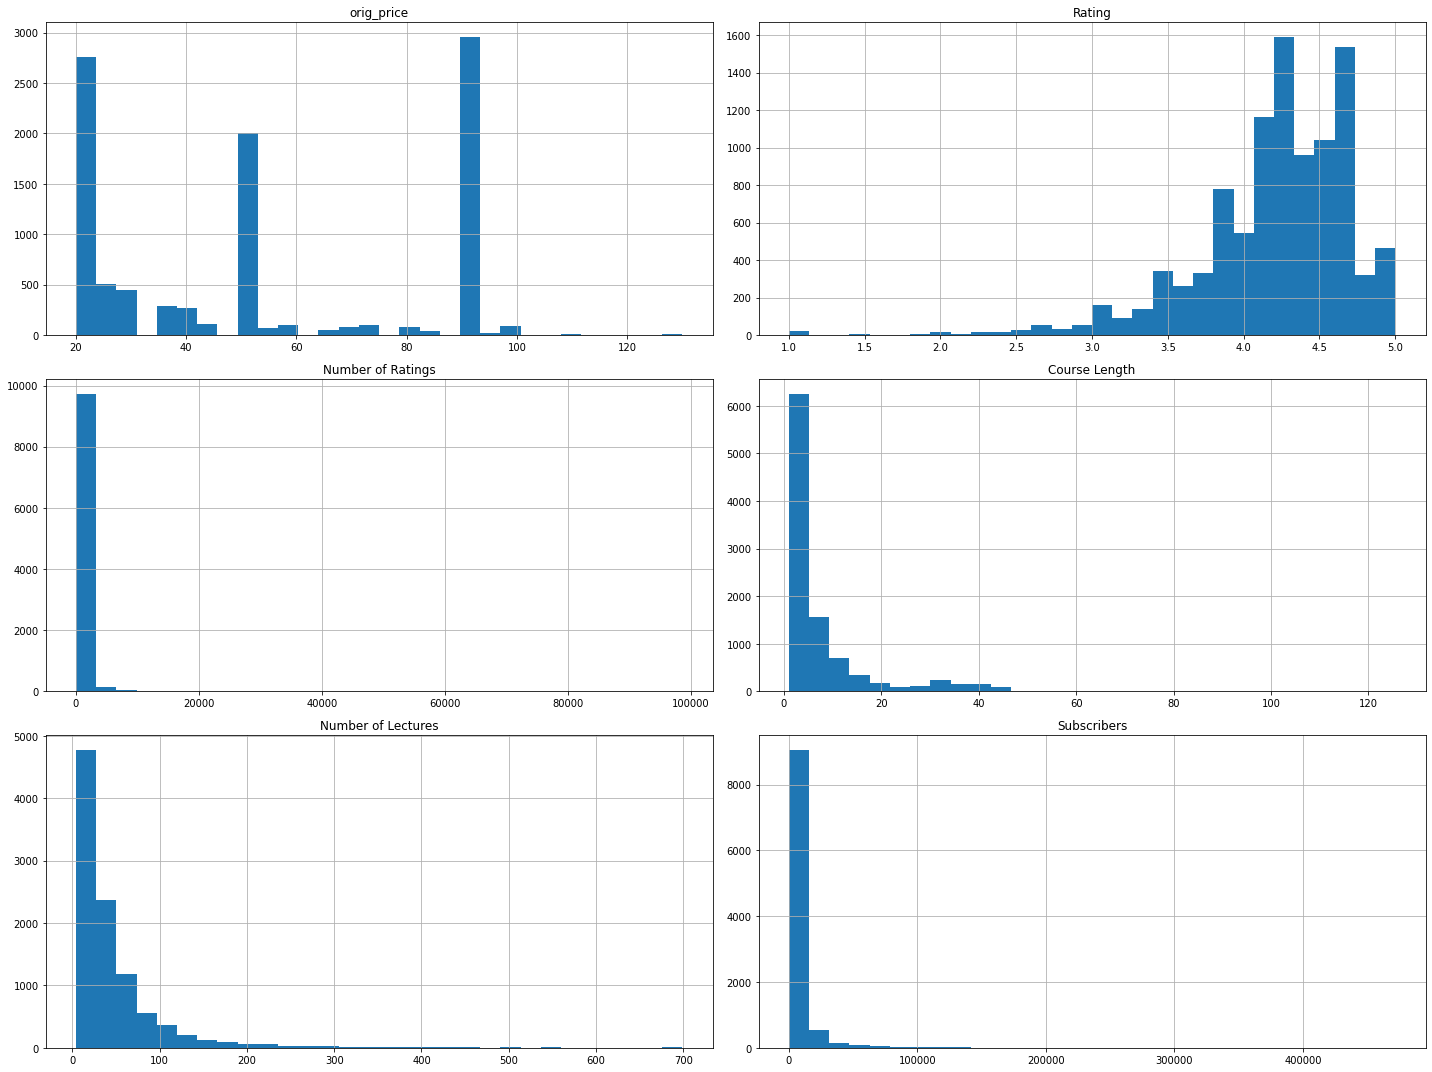

In [11]:
udmey.drop(["off_price"], axis=1).hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

Initial observations from the histograms:

Most course durations are between 0-60 min.
There are usually around 1-50 lectures per course.
Courses tend to have few reviews. There are probably a handful of courses with a large amount of reviews since the X axis goes up to 10000 while over 9000 instances are represented in the first bin.
The majority of courses are in the same range of subscribers. The instances farther up the scale were probably more successful or perhaps courses on a trending topic.
Assuming the prices are in USD, the range is between 0-120 dollars. The plot shows the most common price roughly 20 / 55 / 95 USD.

# Objective

Predicting the number of subscribers for a course.


Chosen Feature:

subscribers column

The column represents how many people have subscribed to each course.

# Motive:
Predicting the number of people subscribed to a course, course popularity.

Splitting the Data:

Before further analysis let's split the data into a training set and a testing set. This will ensure avoidance of bias that could occur from learning the data as a whole.

In [12]:
# use sklearn train_test_split function to split the data
# the random state parameter ensures that data will be shuffled and split the same way in each run
train_set, test_set = train_test_split(udmey, test_size=0.20, random_state=42)

In [13]:
print("Number of instances in training set: ", len(train_set))
print("Number of instances in testing set: ", len(test_set))

Number of instances in training set:  7974
Number of instances in testing set:  1994


In [14]:
df2 = train_set.copy()

In [15]:
df2.head(2)

,url,Course Title,Course Headline,Instructor,off_price,orig_price,Rating,Number of Ratings,Course Length,Number of Lectures,Difficulity,Subscribers
3940,https://www.udemy.com/course/mobile-computer-f...,Mobile Computer Forensics Fundamentals,Understanding the concepts and practices of mo...,John Boyle,14.99,59.99,4.1,12.0,2.0,21,Beginner,69.0
4524,https://www.udemy.com/course/webdev-3000/,WebDev 3000: Pure Python Web Sites,Creating & Testing Standards-Based Internet Ex...,Randall Nagy,14.99,19.99,3.3,8.0,6.5,45,Intermediate,4304.0


In [16]:
corr_matrix = df2.corr()

In [17]:
corr_matrix["Subscribers"].sort_values(ascending=False)

Subscribers           1.000000
Number of Ratings     0.660972
Number of Lectures    0.141142
orig_price            0.089785
Course Length         0.076074
Rating                0.066079
off_price            -0.034812
Name: Subscribers, dtype: float64

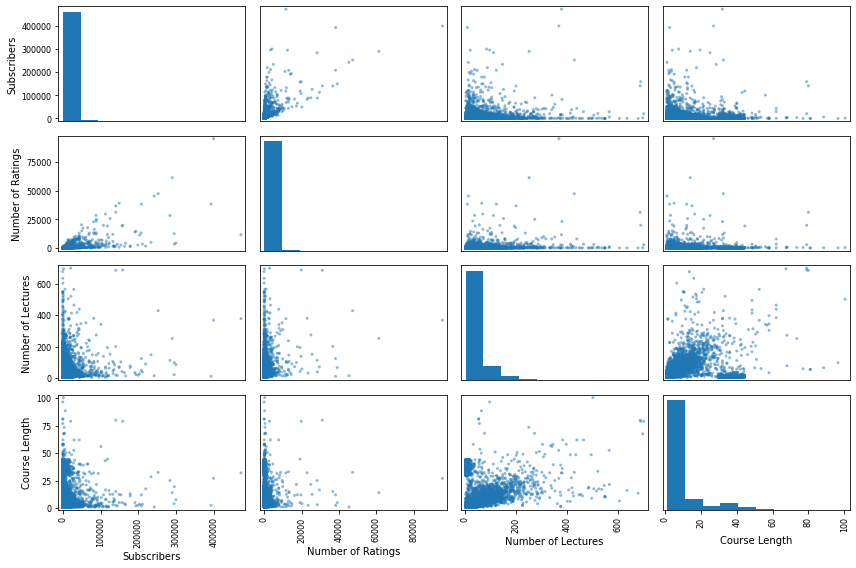

In [18]:
attributes = ["Subscribers", "Number of Ratings", "Number of Lectures", "Course Length"]

scatter_matrix(df2[attributes], figsize=(12,8))
plt.tight_layout()
plt.show()

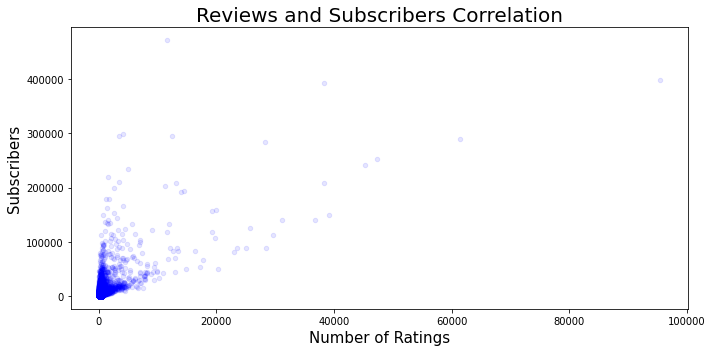

In [19]:
df2.plot(kind="scatter", x="Number of Ratings", y="Subscribers", alpha=0.1,
         color='b', figsize=(10,5))
plt.title("Reviews and Subscribers Correlation", size=20)
plt.xlabel("Number of Ratings", size=15)
plt.ylabel("Subscribers", size=15)
plt.tight_layout()
plt.show()

# Correlations with num_subscribers Attribute- Overview:

The strongest positive correlations (0.1 or more) are:

*Number of Ratings

*Number of Lectures

*Course Length 

The strongest negative correlations (-0.1 or less) are:

*off_price 

In [20]:
df2.drop_duplicates(inplace=True)

In [28]:
level_values = df2["Difficulity"].value_counts()
level_values

All Levels      3562
Beginner        2730
Intermediate    1247
Expert           168
Name: Difficulity, dtype: int64

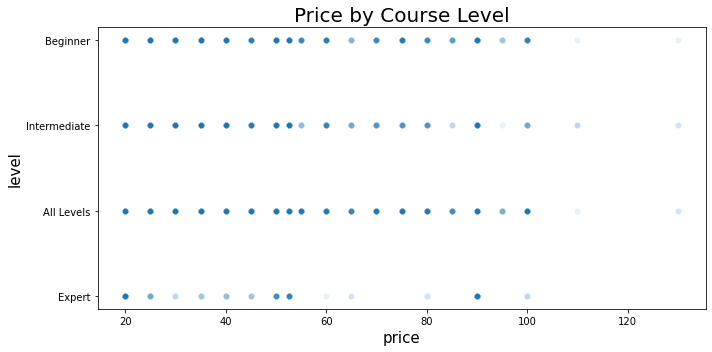

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=df2["Difficulity"], x=df2["orig_price"], alpha=0.1)
plt.title("Price by Course Level", size=20)
plt.xlabel("price", size=15)
plt.ylabel("level", size=15)
plt.tight_layout()
plt.show()

# Observations:
*All Levels and Beginners are the most common level, representing over 50%.

*Price variations according to the level of the course also show that Expert is the least common level in the data. It is also the only level that does not provide free courses. The other levels are dispersed more frequently throughout the line.



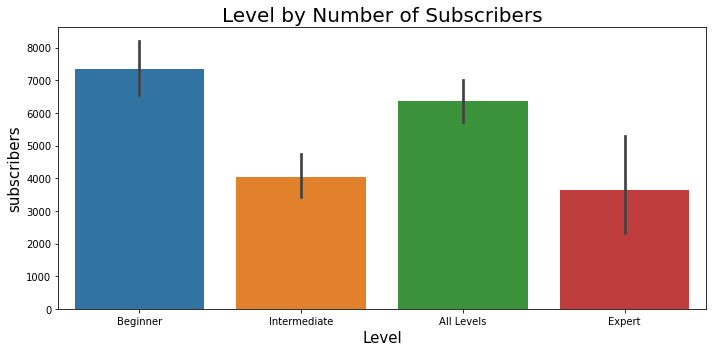

In [34]:
# plot subject by number of subscribers and level
# the black bars represent the error
plt.figure(figsize=(10,5))
sns.barplot(x=df2["Difficulity"], y=df2["Subscribers"])
plt.title("Level by Number of Subscribers", size=20)
plt.xlabel("Level", size=15)
plt.ylabel("subscribers", size=15)
plt.tight_layout()
plt.show()

In [42]:
df3 = train_set.copy().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7974 entries, 3940 to 4886
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 7974 non-null   object 
 1   Course Title        7974 non-null   object 
 2   Course Headline     7974 non-null   object 
 3   Instructor          7974 non-null   object 
 4   off_price           7974 non-null   float64
 5   orig_price          7974 non-null   float64
 6   Rating              7974 non-null   float64
 7   Number of Ratings   7974 non-null   float64
 8   Course Length       7974 non-null   float64
 9   Number of Lectures  7974 non-null   int64  
 10  Difficulity         7974 non-null   object 
 11  Subscribers         7974 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 809.9+ KB


In [39]:
df3.shape

(7974, 12)

In [40]:
X_train = df3.drop("Subscribers", axis=1)

In [41]:
y_train = df3["Subscribers"].copy()

In [54]:
num_features

['orig_price', 'Number of Ratings', 'Number of Lectures', 'Course Length']

# Removing the Following Columns:

The reason for removing these columns is for the model to generalize better. Furthermore, these columns have a unique value for each instance (i.e. URL, course ID) which does not provide information the model can learn from to predict on new data.


Course_title

Course Headline

Instructor 

Rating 

Url

Off_price 


In [61]:
num_features = ["orig_price", "Number of Ratings", "Number of Lectures", "Course Length"]
levels = ["All Levels", "Beginner", "Intermediate", "Expert"]
full_pipeline = ColumnTransformer([("num", MinMaxScaler(), num_features),
                                   ("Difficulity", OrdinalEncoder(categories=[levels]), ["Difficulity"]),
])
features = num_features+["Difficulity"]


X_train_prepared = full_pipeline.fit_transform(X_train)
X_tr_testing = full_pipeline.transform(X_train)





In [64]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# function prints evaluation metrics
def display_evaluation(actual, pred):
    mse = metrics.mean_squared_error(actual, pred)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", np.sqrt(mse))

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_train_prepared, y_train)

LinearRegression()

In [71]:
lr_pred = lr.predict(X_tr_testing)

In [72]:
some_data = X_train.iloc[:10]
some_labels = y_train.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lr.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 3539.55129524  2320.94943247  2934.9529893   4974.61206865
  4080.41604834  3180.47711954  2578.45490286 12573.0200109
  3762.97610496 10462.57290998]
Labels: [69.0, 4304.0, 1901.0, 294.0, 9513.0, 6050.152035559147, 408.0, 33288.0, 3783.0, 34725.0]


In [75]:
display_evaluation(y_train, lr_pred)

Mean Squared Error: 210450821.00328663
Root Mean Squared Error: 14506.923209395114


In [78]:

lr_scores = cross_val_score(lr, X_train_prepared, y_train, cv=10, scoring="neg_mean_squared_error", )

lr_rmse_scores = np.sqrt(-lr_scores)
display_scores(lr_rmse_scores)

Scores: [21008.0057591  13509.84699293 13049.00856565 14038.3629793
 13113.69667591 12606.99384434 11233.8220254  15129.62627144
 18483.67381478 12649.78456159]
Mean: 14482.282149044235
Standard deviation: 2855.0393840225656


In [81]:
lr_pred = cross_val_predict(lr, X_tr_testing, y_train, cv=10)

In [82]:
some_data = X_train.iloc[:10]
some_labels = y_train.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lr.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 3539.55129524  2320.94943247  2934.9529893   4974.61206865
  4080.41604834  3180.47711954  2578.45490286 12573.0200109
  3762.97610496 10462.57290998]
Labels: [69.0, 4304.0, 1901.0, 294.0, 9513.0, 6050.152035559147, 408.0, 33288.0, 3783.0, 34725.0]


In [83]:
display_evaluation(y_train, lr_pred)


Mean Squared Error: 217902751.58995843
Root Mean Squared Error: 14761.529446163715
